In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


# Load Data

In [2]:
cifar10_dataset = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10_dataset.load_data()

In [3]:
print('Training images:', train_images.shape)
print('Training labels:', train_labels.shape)
print('Test images:', test_images.shape)
print('Test labels:', test_labels.shape)

Training images: (50000, 32, 32, 3)
Training labels: (50000, 1)
Test images: (10000, 32, 32, 3)
Test labels: (10000, 1)


In [4]:
train_images

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

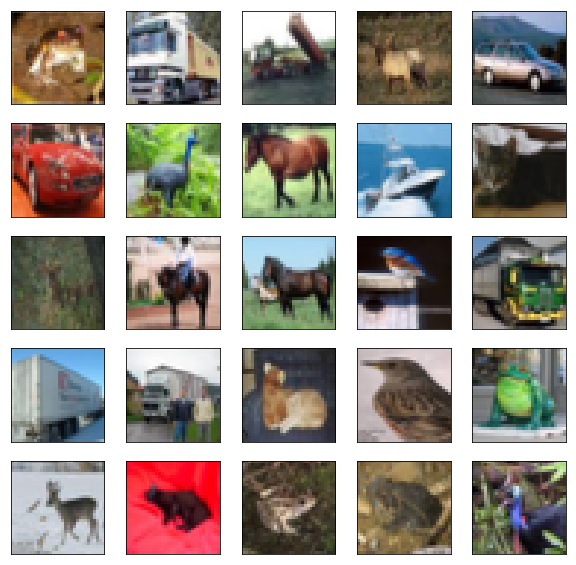

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)

# Preprocessing Data

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [8]:
print('Training image shape: ', train_images.shape)
print('Training label shape: ', train_labels.shape)

Training image shape:  (50000, 32, 32, 3)
Training label shape:  (50000, 1)


In [9]:
np.random.seed(42)
random_arr_50000 = np.arange(50000)
np.random.shuffle(random_arr_50000 )
random_arr_50000 

array([33553,  9427,   199, ..., 38158,   860, 15795])

In [10]:
X_train_50000 = train_images[random_arr_50000]
y_train_50000 = train_labels[random_arr_50000]#.astype(int)
print (type(y_train_50000[0]))

<class 'numpy.ndarray'>


# Split Data

In [11]:
X_train, X_val, y_train, y_val  = train_test_split(X_train_50000, y_train_50000, test_size = 1/25, random_state = 42)

In [12]:
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(48000, 32, 32, 3) (2000, 32, 32, 3)
(48000, 1) (2000, 1)


# Check Optimal Number of Neurons for First Layer

In [13]:
Nron_size_list_RELU = []
Train_error_list_RELU = []
Val_error_list_RELU = []


for j in [300,600,900,1000,2000,3000,5000,8000]:
    Nron_size_list_RELU.append(j)
    print('Neuron_set_size:', j)

    model_relu = keras.Sequential([
    keras.layers.Flatten(input_shape=(32 , 32, 3)),
    keras.layers.Dense(j, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)])
    model_relu.compile(optimizer=tf.train.GradientDescentOptimizer(
    learning_rate=0.05,
    use_locking=False,
    name='GradientDescent'), 

    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

    model_relu.fit(X_train, y_train, epochs=5)
    train_loss, train_acc = model_relu.evaluate(X_train, y_train)
    train_error = 1 - train_acc

    val_loss, val_acc = model_relu.evaluate(X_val, y_val)
    val_error = 1 - val_acc
    print('Train error, Val_error',  train_error, '/', val_error)
                                   
    Train_error_list_RELU.append(train_error)
    Val_error_list_RELU.append(val_error)


print("Nron_size_list_RELU: ", Nron_size_list_RELU)
print("Train_error_list_RELU: ", Train_error_list_RELU)
print("Val_error_list_RELU: ", Val_error_list_RELU)

Neuron_set_size: 300
Epoch 1/5
38784/48000 [=======================>......] - ETA: 1s - loss: 1.9017 - acc: 0.3112

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(Nron_size_list_RELU, Train_error_list_RELU, 'go-', label = "Training(Relu)")
plt.plot(Nron_size_list_RELU, Val_error_list_RELU, 'yo-', label = "Validation(Relu)")
plt.xlabel('Number of Neurons',fontsize=16)
plt.ylabel('Error rate',fontsize=16)
plt.legend(fontsize=16)
plt.title('Number of Neurons vs Error (Hidden Layer 1)', fontsize=18)

In [ ]:
best_val_locatin_RELU = np.argmin(Val_error_list_RELU)
print("BEST VALIDATION ERROR", Val_error_list_RELU[best_val_locatin_RELU])
print("BEST VALIDATION ACCURACY", 1 - Val_error_list_RELU[best_val_locatin_RELU])
best_val_locatin_RELU

# Check Optimal Number of Neurons for Second Layer

In [106]:
Nron_size_list_RELU = []
Train_error_list_RELU = []
Val_error_list_RELU = []


for j in [512,256,64,16]:
    Nron_size_list_RELU.append(j)
    print('Neuron_set_size:', j)

    model_relu = keras.Sequential([
    keras.layers.Flatten(input_shape=(32 , 32, 3)),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(j, activation=tf.nn.relu),

    keras.layers.Dense(10, activation=tf.nn.softmax)])
    model_relu.compile(optimizer=tf.train.GradientDescentOptimizer(
    learning_rate=0.05,
    use_locking=False,
    name='GradientDescent'), 

    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

    model_relu.fit(X_train, y_train, epochs=5)
    train_loss, train_acc = model_relu.evaluate(X_train, y_train)
    train_error = 1 - train_acc

    val_loss, val_acc = model_relu.evaluate(X_val, y_val)
    val_error = 1 - val_acc
    print('Train error, Val_error',  train_error, '/', val_error)
                                   
    Train_error_list_RELU.append(train_error)
    Val_error_list_RELU.append(val_error)


print("Nron_size_list_RELU: ", Nron_size_list_RELU)
print("Train_error_list_RELU: ", Train_error_list_RELU)
print("Val_error_list_RELU: ", Val_error_list_RELU)

Neuron_set_size: 512
Epoch 1/5
48000/48000 [==============================] - 40s 825us/step - loss: 1.8440 - acc: 0.3357
Epoch 2/5
48000/48000 [==============================] - 30s 631us/step - loss: 1.6465 - acc: 0.4114
Epoch 3/5
48000/48000 [==============================] - 28s 592us/step - loss: 1.5567 - acc: 0.4463
Epoch 4/5
48000/48000 [==============================] - 29s 601us/step - loss: 1.4903 - acc: 0.4677
Epoch 5/5
2000/2000 [==============================] - 1s 417us/step
Train error, Val_error 0.4859375 / 0.5335
Neuron_set_size: 256
Epoch 1/5
48000/48000 [==============================] - 28s 580us/step - loss: 1.8484 - acc: 0.3332
Epoch 2/5
48000/48000 [==============================] - 26s 541us/step - loss: 1.6498 - acc: 0.4083
Epoch 3/5
48000/48000 [==============================] - 26s 545us/step - loss: 1.5634 - acc: 0.4414
Epoch 4/5
48000/48000 [==============================] - 26s 542us/step - loss: 1.4978 - acc: 0.4675
Epoch 5/5
2000/2000 [==================

Text(0.5,1,'Number of Neurons vs Error (Hidden Layer 2)')

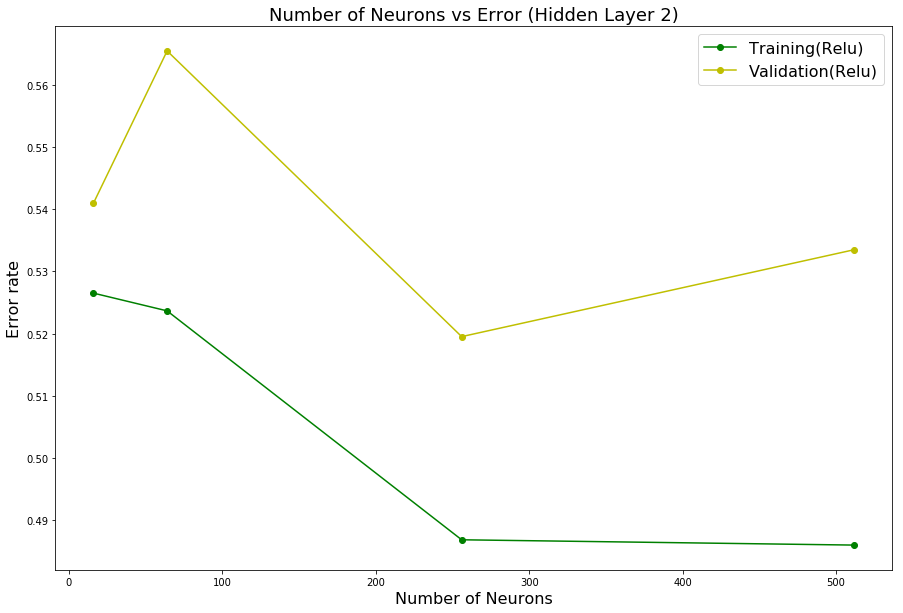

In [118]:
plt.figure(figsize = (15,10))
plt.plot(Nron_size_list_RELU, Train_error_list_RELU, 'go-', label = "Training(Relu)")
plt.plot(Nron_size_list_RELU, Val_error_list_RELU, 'yo-', label = "Validation(Relu)")
plt.xlabel('Number of Neurons',fontsize=16)
plt.ylabel('Error rate',fontsize=16)
plt.legend(fontsize=16)
plt.title('Number of Neurons vs Error (Hidden Layer 2)', fontsize=18)

In [112]:
best_val_locatin_RELU = np.argmin(Val_error_list_RELU)
print("BEST VALIDATION ERROR", Val_error_list_RELU[best_val_locatin_RELU])
print("BEST VALIDATION ACCURACY", 1 - Val_error_list_RELU[best_val_locatin_RELU])
best_val_locatin_RELU

BEST VALIDATION ERROR 0.5195000000000001
BEST VALIDATION ACCURACY 0.4804999999999999


1

# Check Optimal Number of Neurons for Third Layer

In [53]:
Nron_size_list_RELU = []
Train_error_list_RELU = []
Val_error_list_RELU = []


for j in [256,64,16]:
    Nron_size_list_RELU.append(j)
    print('Neuron_set_size:', j)

    model_relu = keras.Sequential([
    keras.layers.Flatten(input_shape=(32 , 32, 3)),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(j, activation=tf.nn.relu),

    keras.layers.Dense(10, activation=tf.nn.softmax)])
    model_relu.compile(optimizer=tf.train.GradientDescentOptimizer(
    learning_rate=0.05,
    use_locking=False,
    name='GradientDescent'), 

    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

    model_relu.fit(X_train, y_train, epochs=5)
    train_loss, train_acc = model_relu.evaluate(X_train, y_train)
    train_error = 1 - train_acc

    val_loss, val_acc = model_relu.evaluate(X_val, y_val)
    val_error = 1 - val_acc
    print('Train error, Val_error',  train_error, '/', val_error)
                                   
    Train_error_list_RELU.append(train_error)
    Val_error_list_RELU.append(val_error)

print("Nron_size_list_RELU: ", Nron_size_list_RELU)
print("Train_error_list_RELU: ", Train_error_list_RELU)
print("Val_error_list_RELU: ", Val_error_list_RELU)

Neuron_set_size: 256
Epoch 1/5
48000/48000 [==============================] - 28s 578us/step - loss: 1.8612 - acc: 0.3251
Epoch 2/5
48000/48000 [==============================] - 25s 516us/step - loss: 1.6596 - acc: 0.4057
Epoch 3/5
48000/48000 [==============================] - 25s 512us/step - loss: 1.5715 - acc: 0.4357
Epoch 4/5
48000/48000 [==============================] - 27s 564us/step - loss: 1.5034 - acc: 0.4625
Epoch 5/5
2000/2000 [==============================] - 1s 316us/step
Train error, Val_error 0.524625 / 0.5605
Neuron_set_size: 64
Epoch 1/5
48000/48000 [==============================] - 26s 541us/step - loss: 1.8837 - acc: 0.3155
Epoch 2/5
48000/48000 [==============================] - 26s 534us/step - loss: 1.6802 - acc: 0.3970
Epoch 3/5
48000/48000 [==============================] - 23s 489us/step - loss: 1.5916 - acc: 0.4306
Epoch 4/5
48000/48000 [==============================] - 23s 473us/step - loss: 1.5295 - acc: 0.4549
Epoch 5/5
2000/2000 [====================

# Check Optimal Number of Neurons for Fourth Layer

In [54]:
Nron_size_list_RELU = []
Train_error_list_RELU = []
Val_error_list_RELU = []


for j in [64,16]:
    Nron_size_list_RELU.append(j)
    print('Neuron_set_size:', j)

    model_relu = keras.Sequential([
    keras.layers.Flatten(input_shape=(32 , 32, 3)),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(j, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)])
    model_relu.compile(optimizer=tf.train.GradientDescentOptimizer(
    learning_rate=0.05,
    use_locking=False,
    name='GradientDescent'), 

    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

    model_relu.fit(X_train, y_train, epochs=5)
    train_loss, train_acc = model_relu.evaluate(X_train, y_train)
    train_error = 1 - train_acc

    val_loss, val_acc = model_relu.evaluate(X_val, y_val)
    val_error = 1 - val_acc
    print('Train error, Val_error',  train_error, '/', val_error)
                                   
    Train_error_list_RELU.append(train_error)
    Val_error_list_RELU.append(val_error)

print("Nron_size_list_RELU: ", Nron_size_list_RELU)
print("Train_error_list_RELU: ", Train_error_list_RELU)
print("Val_error_list_RELU: ", Val_error_list_RELU)


Neuron_set_size: 64
Epoch 1/5
48000/48000 [==============================] - 28s 579us/step - loss: 1.8866 - acc: 0.3164
Epoch 2/5
48000/48000 [==============================] - 23s 472us/step - loss: 1.7008 - acc: 0.3895
Epoch 3/5
48000/48000 [==============================] - 25s 520us/step - loss: 1.6129 - acc: 0.4227
Epoch 4/5
48000/48000 [==============================] - 27s 560us/step - loss: 1.5512 - acc: 0.4438
Epoch 5/5
2000/2000 [==============================] - 0s 226us/step
Train error, Val_error 0.5166666666666666 / 0.5435
Neuron_set_size: 16
Epoch 1/5
48000/48000 [==============================] - 29s 610us/step - loss: 2.0267 - acc: 0.24370s - loss: 2.032
Epoch 2/5
48000/48000 [==============================] - 44s 921us/step - loss: 1.7665 - acc: 0.3616
Epoch 3/5
48000/48000 [==============================] - 53s 1ms/step - loss: 1.6583 - acc: 0.4049
Epoch 4/5
48000/48000 [==============================] - 80s 2ms/step - loss: 1.5893 - acc: 0.4299
Epoch 5/5
2000/2000 

# Compare Results for 1, 5, and 10 Epochs

In [57]:
model_relu = keras.Sequential([
    keras.layers.Flatten(input_shape=(32 , 32, 3)),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_relu.compile(optimizer=tf.train.GradientDescentOptimizer(
    learning_rate=0.05,
    use_locking=False,
    name='GradientDescent'), 

loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

#model_relu.fit(X_train, y_train, epochs=1)
#model_relu.fit(X_train, y_train, epochs=5)
model_relu.fit(X_train, y_train, epochs=10)

val_loss, val_acc = model_relu.evaluate(X_val, y_val)
val_error = 1 - val_acc


print('Relu Validation Accuracy:', val_acc)
print('Relu Validation Loss:' , val_loss)
print('Relu Validation Error:', val_error)

Epoch 1/10
48000/48000 [==============================] - 28s 577us/step - loss: 1.9331 - acc: 0.2917
Epoch 2/10
48000/48000 [==============================] - 26s 552us/step - loss: 1.7180 - acc: 0.3827
Epoch 3/10
48000/48000 [==============================] - 26s 542us/step - loss: 1.6261 - acc: 0.4169
Epoch 4/10
48000/48000 [==============================] - 26s 541us/step - loss: 1.5649 - acc: 0.4402
Epoch 5/10
48000/48000 [==============================] - 33s 680us/step - loss: 1.5157 - acc: 0.4578
Epoch 6/10
48000/48000 [==============================] - 48s 1ms/step - loss: 1.4755 - acc: 0.4709
Epoch 7/10
48000/48000 [==============================] - 46s 965us/step - loss: 1.4365 - acc: 0.4829
Epoch 8/10
48000/48000 [==============================] - 41s 846us/step - loss: 1.3994 - acc: 0.4982
Epoch 9/10
48000/48000 [==============================] - 43s 901us/step - loss: 1.3649 - acc: 0.5106
Epoch 10/10
2000/2000 [==============================] - 4s 2ms/step
Relu Validation

Text(0.5,1,'Epochs vs Error Rate')

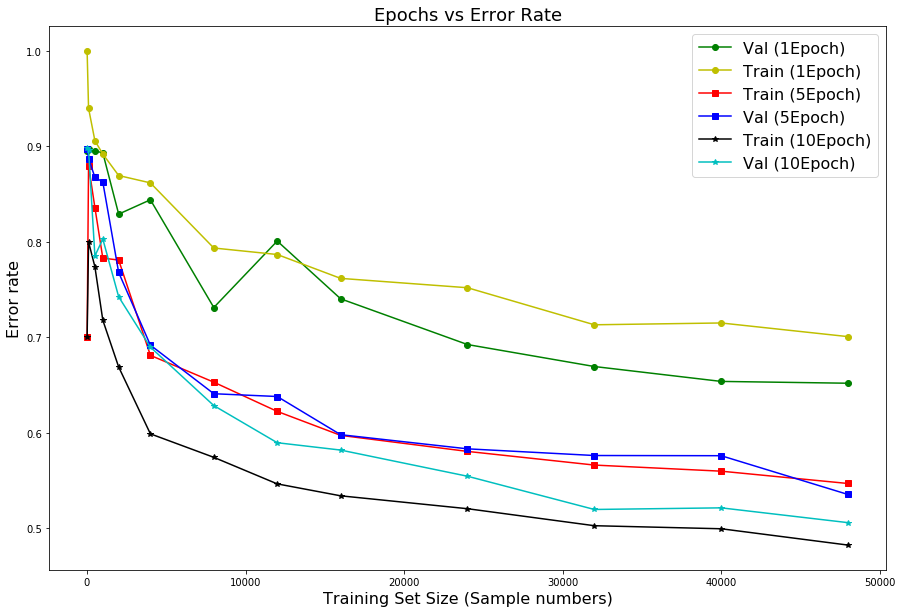

In [91]:
x = [10, 100, 500, 1000, 2000, 4000, 8000, 12000, 16000, 24000, 32000, 40000, 48000]

y_val_1 = [0.8949, 0.8972, 0.8954, 0.8932, 0.8291, 0.8441, 0.7313, 0.8009, 0.7404, 0.6925, 0.6695, 0.6539, 0.652]
y_train_1 = [1, 0.94, 0.906, 0.892, 0.8695, 0.8618, 0.7936, 0.7868, 0.7618, 0.752, 0.7132, 0.7151, 0.7008]

y_val_5 = [0.8974, 0.8872, 0.8678, 0.8626, 0.768, 0.6919, 0.641, 0.6381, 0.5981, 0.5833, 0.5763, 0.5761, 0.5355]
y_train_5 = [0.7, 0.88, 0.836, 0.783, 0.781, 0.6812, 0.6531, 0.6225, 0.5974, 0.5806, 0.5663, 0.5599, 0.547]

y_val_10 = [0.898, 0.8964, 0.7853, 0.803, 0.7425, 0.6898, 0.6286, 0.5897, 0.582, 0.5546, 0.5198, 0.5215, 0.506]
y_train_10 = [0.7, 0.8, 0.774, 0.718, 0.669, 0.599, 0.5744, 0.5466, 0.5341, 0.5206, 0.5028, 0.4996, 0.4825]

plt.figure(figsize = (15,10))
plt.plot(x, y_val_1, 'go-', label = "Val (1Epoch)")
plt.plot(x, y_train_1, 'yo-', label = "Train (1Epoch)")
plt.plot(x, y_train_5, 'rs-', label = "Train (5Epoch)")
plt.plot(x, y_val_5, 'bs-', label = "Val (5Epoch)")
plt.plot(x, y_train_10, 'k*-', label = "Train (10Epoch)")
plt.plot(x, y_val_10, 'c*-', label = "Val (10Epoch)")
 

plt.xlabel('Training Set Size (Sample numbers)',fontsize=16)
plt.ylabel('Error rate',fontsize=16)
plt.legend(loc="upper right", fontsize=16)
plt.title('Epochs vs Error Rate', fontsize=18)

# Simulate and Compare Results of Various Models

In [59]:
model_relu = keras.Sequential([
    keras.layers.Flatten(input_shape=(32 , 32, 3)),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_relu.compile(optimizer=tf.train.GradientDescentOptimizer(
    learning_rate=0.05,
    use_locking=False,
    name='GradientDescent'), 

loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

model_relu.fit(X_train, y_train, epochs=1)
val_loss, val_acc = model_relu.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Relu Validation Error:', val_error)

model_relu.fit(X_train, y_train, epochs=4)
val_loss, val_acc = model_relu.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Relu Validation Error:', val_error)

model_relu.fit(X_train, y_train, epochs=5)
val_loss, val_acc = model_relu.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Relu Validation Error:', val_error)

model_relu.fit(X_train, y_train, epochs=5)
val_loss, val_acc = model_relu.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Relu Validation Error:', val_error)

model_relu.fit(X_train, y_train, epochs=5)
val_loss, val_acc = model_relu.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Relu Validation Error:', val_error)

Epoch 1/1
2000/2000 [==============================] - 1s 699us/step
Relu Validation Error: 0.627
Epoch 1/4
48000/48000 [==============================] - 24s 506us/step - loss: 1.7162 - acc: 0.3819
Epoch 2/4
48000/48000 [==============================] - 28s 585us/step - loss: 1.6276 - acc: 0.4154
Epoch 3/4
48000/48000 [==============================] - 27s 554us/step - loss: 1.5685 - acc: 0.4386
Epoch 4/4
2000/2000 [==============================] - 0s 243us/step
Relu Validation Error: 0.5535
Epoch 1/5
48000/48000 [==============================] - 26s 552us/step - loss: 1.4768 - acc: 0.4717
Epoch 2/5
48000/48000 [==============================] - 23s 481us/step - loss: 1.4362 - acc: 0.4893
Epoch 3/5
48000/48000 [==============================] - 23s 479us/step - loss: 1.3982 - acc: 0.4998
Epoch 4/5
48000/48000 [==============================] - 23s 482us/step - loss: 1.3660 - acc: 0.5102
Epoch 5/5
2000/2000 [==============================] - 0s 187us/step
Relu Validation Error: 0.50

In [78]:
model_relu = keras.Sequential([
    keras.layers.Flatten(input_shape=(32 , 32, 3)),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.sigmoid)
])
model_relu.compile(optimizer=tf.train.GradientDescentOptimizer(
    learning_rate=0.05,
    use_locking=False,
    name='GradientDescent'), 

loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

model_relu.fit(X_train, y_train, epochs=1)
val_loss, val_acc = model_relu.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Relu Validation Error:', val_error)

model_relu.fit(X_train, y_train, epochs=4)
val_loss, val_acc = model_relu.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Relu Validation Error:', val_error)

model_relu.fit(X_train, y_train, epochs=5)
val_loss, val_acc = model_relu.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Relu Validation Error:', val_error)

model_relu.fit(X_train, y_train, epochs=5)
val_loss, val_acc = model_relu.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Relu Validation Error:', val_error)

model_relu.fit(X_train, y_train, epochs=5)
val_loss, val_acc = model_relu.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Relu Validation Error:', val_error)

Epoch 1/1
2000/2000 [==============================] - 3s 2ms/step
Relu Validation Error: 0.6475
Epoch 1/4
48000/48000 [==============================] - 37s 779us/step - loss: 1.7267 - acc: 0.3776
Epoch 2/4
48000/48000 [==============================] - 36s 745us/step - loss: 1.6331 - acc: 0.4114
Epoch 3/4
48000/48000 [==============================] - 37s 777us/step - loss: 1.5633 - acc: 0.43801s - los
Epoch 4/4
2000/2000 [==============================] - 1s 351us/step
Relu Validation Error: 0.5509999999999999
Epoch 1/5
48000/48000 [==============================] - 36s 746us/step - loss: 1.4699 - acc: 0.4705
Epoch 2/5
48000/48000 [==============================] - 33s 680us/step - loss: 1.4301 - acc: 0.4867
Epoch 3/5
48000/48000 [==============================] - 31s 642us/step - loss: 1.3916 - acc: 0.5023
Epoch 4/5
48000/48000 [==============================] - 42s 880us/step - loss: 1.3587 - acc: 0.5110
Epoch 5/5
2000/2000 [==============================] - 1s 475us/step
Relu Val

In [60]:
model_relu = keras.Sequential([
    keras.layers.Flatten(input_shape=(32 , 32, 3)),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.tanh)
])
model_relu.compile(optimizer=tf.train.GradientDescentOptimizer(
    learning_rate=0.05,
    use_locking=False,
    name='GradientDescent'), 

loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

model_relu.fit(X_train, y_train, epochs=1)
val_loss, val_acc = model_relu.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Relu Validation Error:', val_error)

model_relu.fit(X_train, y_train, epochs=4)
val_loss, val_acc = model_relu.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Relu Validation Error:', val_error)

model_relu.fit(X_train, y_train, epochs=5)
val_loss, val_acc = model_relu.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Relu Validation Error:', val_error)

model_relu.fit(X_train, y_train, epochs=5)
val_loss, val_acc = model_relu.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Relu Validation Error:', val_error)

model_relu.fit(X_train, y_train, epochs=5)
val_loss, val_acc = model_relu.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Relu Validation Error:', val_error)

Epoch 1/1
2000/2000 [==============================] - 1s 396us/step
Relu Validation Error: 0.899
Epoch 1/4
48000/48000 [==============================] - 26s 538us/step - loss: 9.6692 - acc: 0.1000
Epoch 2/4
48000/48000 [==============================] - 26s 537us/step - loss: 9.6692 - acc: 0.1000
Epoch 3/4
48000/48000 [==============================] - 23s 485us/step - loss: 9.6692 - acc: 0.1000
Epoch 4/4
2000/2000 [==============================] - 1s 297us/step
Relu Validation Error: 0.899
Epoch 1/5
48000/48000 [==============================] - 24s 500us/step - loss: 9.6692 - acc: 0.1000
Epoch 2/5
48000/48000 [==============================] - 28s 582us/step - loss: 9.6692 - acc: 0.1000
Epoch 3/5
48000/48000 [==============================] - 27s 568us/step - loss: 9.6692 - acc: 0.1000
Epoch 4/5
48000/48000 [==============================] - 26s 545us/step - loss: 9.6692 - acc: 0.1000
Epoch 5/5
2000/2000 [==============================] - 1s 258us/step
Relu Validation Error: 0.899

In [77]:
model_sigmoid = keras.Sequential([
    keras.layers.Flatten(input_shape=(32 , 32, 3)),
    keras.layers.Dense(1024, activation=tf.nn.sigmoid),
    keras.layers.Dense(256, activation=tf.nn.sigmoid),
    keras.layers.Dense(64, activation=tf.nn.sigmoid),
    keras.layers.Dense(16, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_sigmoid.compile(optimizer=tf.train.GradientDescentOptimizer(
    learning_rate=0.05,
    use_locking=False,
    name='GradientDescent'), 

loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

model_sigmoid.fit(X_train, y_train, epochs=1)
val_loss, val_acc = model_sigmoid.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Sigmoid Validation Error:', val_error)
model_sigmoid.fit(X_train, y_train, epochs=4)
val_loss, val_acc = model_sigmoid.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Sigmoid Validation Error:', val_error)
model_sigmoid.fit(X_train, y_train, epochs=5)
val_loss, val_acc = model_sigmoid.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Sigmoid Validation Error:', val_error)
model_sigmoid.fit(X_train, y_train, epochs=5)
val_loss, val_acc = model_sigmoid.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Sigmoid Validation Error:', val_error)
model_sigmoid.fit(X_train, y_train, epochs=5)
val_loss, val_acc = model_sigmoid.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Sigmoid Validation Error:', val_error)

Epoch 1/1
2000/2000 [==============================] - 2s 772us/step
Sigmoid Validation Error: 0.8785000000000001
Epoch 1/4
48000/48000 [==============================] - 27s 557us/step - loss: 2.2136 - acc: 0.1677
Epoch 2/4
48000/48000 [==============================] - 26s 539us/step - loss: 2.0648 - acc: 0.2063
Epoch 3/4
48000/48000 [==============================] - 25s 531us/step - loss: 2.0233 - acc: 0.2270
Epoch 4/4
2000/2000 [==============================] - 0s 240us/step
Sigmoid Validation Error: 0.7395
Epoch 1/5
48000/48000 [==============================] - 26s 550us/step - loss: 1.9205 - acc: 0.2825
Epoch 2/5
48000/48000 [==============================] - 24s 497us/step - loss: 1.8973 - acc: 0.2996
Epoch 3/5
48000/48000 [==============================] - 25s 518us/step - loss: 1.8712 - acc: 0.3150
Epoch 4/5
48000/48000 [==============================] - 26s 544us/step - loss: 1.8496 - acc: 0.3232
Epoch 5/5
2000/2000 [==============================] - 0s 238us/step
Sigmoid 

In [63]:
model_tanh = keras.Sequential([
    keras.layers.Flatten(input_shape=(32 , 32, 3)),
    keras.layers.Dense(1024, activation=tf.nn.tanh),
    keras.layers.Dense(256, activation=tf.nn.tanh),
    keras.layers.Dense(64, activation=tf.nn.tanh),
    keras.layers.Dense(16, activation=tf.nn.tanh),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_tanh.compile(optimizer=tf.train.GradientDescentOptimizer(
    learning_rate=0.05,
    use_locking=False,
    name='GradientDescent'), 

loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

model_tanh.fit(X_train, y_train, epochs=1)
val_loss, val_acc = model_tanh.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Tanh Validation Error:', val_error)
model_tanh.fit(X_train, y_train, epochs=4)
val_loss, val_acc = model_tanh.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Tanh Validation Error:', val_error)
model_tanh.fit(X_train, y_train, epochs=5)
val_loss, val_acc = model_tanh.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Tanh Validation Error:', val_error)
model_tanh.fit(X_train, y_train, epochs=5)
val_loss, val_acc = model_tanh.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Tanh Validation Error:', val_error)
model_tanh.fit(X_train, y_train, epochs=5)
val_loss, val_acc = model_tanh.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Tanh Validation Error:', val_error)

Epoch 1/1
2000/2000 [==============================] - 1s 495us/step
Tanh Validation Error: 0.623
Epoch 1/4
48000/48000 [==============================] - 25s 528us/step - loss: 1.6943 - acc: 0.3910
Epoch 2/4
48000/48000 [==============================] - 23s 481us/step - loss: 1.6126 - acc: 0.4239
Epoch 3/4
48000/48000 [==============================] - 24s 495us/step - loss: 1.5576 - acc: 0.4427
Epoch 4/4
2000/2000 [==============================] - 1s 266us/step
Tanh Validation Error: 0.5660000000000001
Epoch 1/5
48000/48000 [==============================] - 25s 521us/step - loss: 1.4801 - acc: 0.4709
Epoch 2/5
48000/48000 [==============================] - 25s 527us/step - loss: 1.4471 - acc: 0.4818
Epoch 3/5
48000/48000 [==============================] - 34s 709us/step - loss: 1.4213 - acc: 0.4922
Epoch 4/5
48000/48000 [==============================] - 30s 626us/step - loss: 1.3931 - acc: 0.5031
Epoch 5/5
2000/2000 [==============================] - 1s 358us/step
Tanh Validation

In [64]:
model_tanh = keras.Sequential([
    keras.layers.Flatten(input_shape=(32 , 32, 3)),
    keras.layers.Dense(1024, activation=tf.nn.tanh),
    keras.layers.Dense(256, activation=tf.nn.tanh),
    keras.layers.Dense(64, activation=tf.nn.tanh),
    keras.layers.Dense(16, activation=tf.nn.tanh),
    keras.layers.Dense(10, activation=tf.nn.sigmoid)
])

model_tanh.compile(optimizer=tf.train.GradientDescentOptimizer(
    learning_rate=0.05,
    use_locking=False,
    name='GradientDescent'), 

loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

model_tanh.fit(X_train, y_train, epochs=1)
val_loss, val_acc = model_tanh.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Tanh Validation Error:', val_error)
model_tanh.fit(X_train, y_train, epochs=4)
val_loss, val_acc = model_tanh.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Tanh Validation Error:', val_error)
model_tanh.fit(X_train, y_train, epochs=5)
val_loss, val_acc = model_tanh.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Tanh Validation Error:', val_error)
model_tanh.fit(X_train, y_train, epochs=5)
val_loss, val_acc = model_tanh.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Tanh Validation Error:', val_error)
model_tanh.fit(X_train, y_train, epochs=5)
val_loss, val_acc = model_tanh.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Tanh Validation Error:', val_error)

Epoch 1/1
2000/2000 [==============================] - 1s 528us/step
Tanh Validation Error: 0.6775
Epoch 1/4
48000/48000 [==============================] - 24s 501us/step - loss: 1.7583 - acc: 0.3675
Epoch 2/4
48000/48000 [==============================] - 25s 513us/step - loss: 1.6624 - acc: 0.4037
Epoch 3/4
48000/48000 [==============================] - 25s 513us/step - loss: 1.6040 - acc: 0.4276
Epoch 4/4
2000/2000 [==============================] - 1s 265us/step
Tanh Validation Error: 0.5589999999999999
Epoch 1/5
48000/48000 [==============================] - 27s 554us/step - loss: 1.5165 - acc: 0.4612
Epoch 2/5
48000/48000 [==============================] - 27s 559us/step - loss: 1.4850 - acc: 0.4726
Epoch 3/5
48000/48000 [==============================] - 25s 521us/step - loss: 1.4547 - acc: 0.4811
Epoch 4/5
48000/48000 [==============================] - 35s 723us/step - loss: 1.4310 - acc: 0.4925
Epoch 5/5
2000/2000 [==============================] - 1s 330us/step
Tanh Validatio

Text(0.5,1,'Models vs Error Rate (Val)')

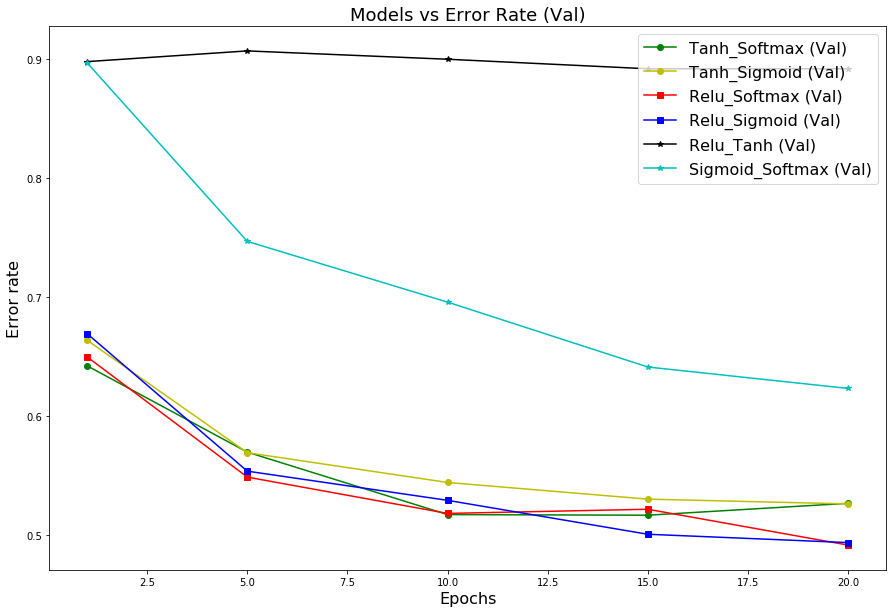

In [95]:
x_epochs=[1, 5, 10, 15, 20]
y_tanh_softmax=[0.642, 0.5695, 0.517, 0.5165, 0.5265]
y_tanh_sigmoid=[0.6635, 0.569, 0.544, 0.53, 0.526]
y_relu_softmax=[0.6495, 0.5485, 0.518, 0.5215, 0.4914]
y_relu_sigmoid=[0.669, 0.5535, 0.529, 0.5005, 0.4935]
y_relu_tanh=[0.8975, 0.9065, 0.8995, 0.8915, 0.8915]
y_sigmoid_softmax =[0.8965, 0.7465, 0.6955, 0.641, 0.623]

plt.figure(figsize = (15,10))
plt.plot(x_epochs, y_tanh_softmax, 'go-', label = "Tanh_Softmax (Val)")
plt.plot(x_epochs, y_tanh_sigmoid, 'yo-', label = "Tanh_Sigmoid (Val)")
plt.plot(x_epochs, y_relu_softmax, 'rs-', label = "Relu_Softmax (Val)")
plt.plot(x_epochs, y_relu_sigmoid, 'bs-', label = "Relu_Sigmoid (Val)")
plt.plot(x_epochs, y_relu_tanh, 'k*-', label = "Relu_Tanh (Val)")
plt.plot(x_epochs, y_sigmoid_softmax, 'c*-', label = "Sigmoid_Softmax (Val)")
 

plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Error rate',fontsize=16)
plt.legend(loc="upper right", fontsize=16)
plt.title('Models vs Error Rate (Val)', fontsize=18)

# Compare Learning Rates of 0.01, 0.05, and 0.1

In [85]:
for j in [0.01, 0.05, 0.1]:
    model_relu = keras.Sequential([
        keras.layers.Flatten(input_shape=(32 , 32, 3)),
        keras.layers.Dense(1024, activation=tf.nn.relu),
        keras.layers.Dense(256, activation=tf.nn.relu),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(16, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    model_relu.compile(optimizer=tf.train.GradientDescentOptimizer(
        learning_rate=j,
        use_locking=False,
        name='GradientDescent'), 

    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

    model_relu.fit(X_train, y_train, epochs=5)
    val_loss, val_acc = model_relu.evaluate(X_val, y_val)
    val_error = 1 - val_acc
    print('Relu Validation Error:', val_error)

Epoch 1/5
48000/48000 [==============================] - 26s 541us/step - loss: 1.9345 - acc: 0.3066
Epoch 2/5
48000/48000 [==============================] - 24s 506us/step - loss: 1.7120 - acc: 0.3891
Epoch 3/5
48000/48000 [==============================] - 25s 525us/step - loss: 1.6238 - acc: 0.4203
Epoch 4/5
48000/48000 [==============================] - 24s 510us/step - loss: 1.5547 - acc: 0.4477
Epoch 5/5
2000/2000 [==============================] - 1s 625us/step
Relu Validation Error: 0.5645
Epoch 1/5
48000/48000 [==============================] - 25s 518us/step - loss: 1.9503 - acc: 0.2909
Epoch 2/5
48000/48000 [==============================] - 24s 490us/step - loss: 1.7300 - acc: 0.3763
Epoch 3/5
48000/48000 [==============================] - 23s 485us/step - loss: 1.6403 - acc: 0.4118
Epoch 4/5
48000/48000 [==============================] - 24s 499us/step - loss: 1.5767 - acc: 0.4354
Epoch 5/5
2000/2000 [==============================] - 1s 584us/step
Relu Validation Error: 0

# Select Best Model (ReLu-ReLu-ReLu-ReLu-Softmax) and Run Test Data

In [ ]:
model_relu = keras.Sequential([
    keras.layers.Flatten(input_shape=(32 , 32, 3)),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_relu.compile(optimizer=tf.train.GradientDescentOptimizer(
    learning_rate=0.05,
    use_locking=False,
    name='GradientDescent'), 

loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

model_relu.fit(X_train, y_train, epochs=1)
val_loss, val_acc = model_relu.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Relu Validation Error:', val_error)

model_relu.fit(X_train, y_train, epochs=4)
val_loss, val_acc = model_relu.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Relu Validation Error:', val_error)

model_relu.fit(X_train, y_train, epochs=5)
val_loss, val_acc = model_relu.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Relu Validation Error:', val_error)

model_relu.fit(X_train, y_train, epochs=5)
val_loss, val_acc = model_relu.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Relu Validation Error:', val_error)

model_relu.fit(X_train, y_train, epochs=5)
val_loss, val_acc = model_relu.evaluate(X_val, y_val)
val_error = 1 - val_acc
print('Relu Validation Error:', val_error)

Epoch 1/1
2000/2000 [==============================] - 1s 328us/step
Relu Validation Error: 0.6545000000000001
Epoch 1/4
48000/48000 [==============================] - 26s 533us/step - loss: 1.7444 - acc: 0.3700
Epoch 2/4
48000/48000 [==============================] - 24s 505us/step - loss: 1.6464 - acc: 0.4101
Epoch 3/4
48000/48000 [==============================] - 24s 499us/step - loss: 1.5764 - acc: 0.4365
Epoch 4/4
2000/2000 [==============================] - 0s 235us/step
Relu Validation Error: 0.5375
Epoch 1/5
48000/48000 [==============================] - 21s 441us/step - loss: 1.4812 - acc: 0.4695
Epoch 2/5
13536/48000 [=======>......................] - ETA: 19s - loss: 1.4401 - acc: 0.4810

In [70]:
test_loss, test_acc = model_relu.evaluate(test_images, test_labels)
test_error = 1 - test_acc

print('Test accuracy:', test_acc)
print('Test loss:' , test_loss)
print('Test error:', test_error)

10000/10000 [==============================] - 3s 346us/step
Test accuracy: 0.5221
Test loss: 1.3981481603622437
Test error: 0.4779


# Generate Predictions and Store Predicted Class Values

In [71]:
predictions = model_relu.predict(test_images)
y_pred = np.full((10000, 1), 0)
for i in range(10000):
    y_pred[i] = np.argmax(predictions[i])

# Generate Confusion Matrices

[[605  35  85  22  63   6  23  29 109  23]
 [ 57 653  19  22  13  15   8  27  75 111]
 [ 67  17 398  70 235  45  70  71  14  13]
 [ 18  16 128 363 121 145  96  67  21  25]
 [ 46  10 112  50 568  31  74  83  16  10]
 [ 20   5 136 210 104 331  75  92  16  11]
 [  6  21  86  60 186  42 546  31  10  12]
 [ 36  14  53  64 121  49  19 613   6  25]
 [126  54  26  28  46  14  11  12 649  34]
 [ 68 167  27  61  28  21  15  41  77 495]]


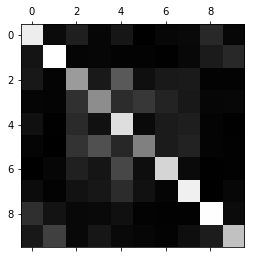

In [111]:
conf_mx = confusion_matrix(test_labels, y_pred)

#row_sum = np.sum(conf_mx, axis =1, keepdims = True)
#norm_conf_mx = conf_mx / row_sum
#print(norm_conf_mx.shape)

#np.fill_diagonal(norm_conf_mx, 0)
#plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
#print(norm_conf_mx)
print(conf_mx)
plt.matshow(conf_mx, cmap = plt.cm.gray)

# Generate Classification Report

In [73]:
print(classification_report(test_labels,y_pred))

             precision    recall  f1-score   support

          0       0.58      0.60      0.59      1000
          1       0.66      0.65      0.66      1000
          2       0.37      0.40      0.38      1000
          3       0.38      0.36      0.37      1000
          4       0.38      0.57      0.46      1000
          5       0.47      0.33      0.39      1000
          6       0.58      0.55      0.56      1000
          7       0.58      0.61      0.59      1000
          8       0.65      0.65      0.65      1000
          9       0.65      0.49      0.56      1000

avg / total       0.53      0.52      0.52     10000



# Example of Prediction Matching Actual Label

In [74]:
print(y_pred[1000])
print(test_labels[1000])

[5]
[5]
